In [1]:
%pip install rioxarray
%pip install xarray 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import rioxarray as rxr
import os
from rasterio.plot import show
from PIL import Image
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import rasterio.features
from shapely.geometry import shape

In [3]:
class_ID = "data/transfer_5941271_files_87719365/class_ID_2020.tif"
segment_ID = "data/transfer_5941271_files_87719365/segment_ID_2020.tif"
polygon_ID = "data/transfer_5941271_files_87719365/polygon_ID.tif"
second_band = "data/transfer_5941271_files_87719365/s2_2020_B02.tif"

In [23]:
def open_tif(file):
    with rasterio.open(file) as ds:
        # print(ds)
        # print(ds.crs)
        # print(ds.bounds())
        # print(ds.resolution())
        # print(ds.shape)
        # print(ds.transform())
        # print(ds.count)
        show(ds)
    return 

In [56]:
#open_tif(segment_ID)
with rasterio.open(segment_ID) as dataset:
    # Read the image data as a NumPy array
    image = dataset.read(1)  # You may need to adjust the band number (1 in this example)

image[0]    

array([  1,   1,   1, ..., 701, 701, 701], dtype=uint16)

In [66]:
with rasterio.open(polygon_ID) as dataset2:

    image2 = dataset2.read()  

image2

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [69]:
# Open the raster
class_raster = rasterio.open(polygon_ID)

# Get statistics of the raster
print(class_raster.descriptions)
print(class_raster.bounds)
print(class_raster.crs)
print(class_raster.count)  # Number of bands
print(class_raster.width, class_raster.height)  # Dimensions
print(class_raster.transform)  # Affine transformation matrix


('polygon_ID',)
BoundingBox(left=402570.0, bottom=1212060.0, right=454400.0, top=1257190.0)
EPSG:32630
1
5183 4513
| 10.00, 0.00, 402570.00|
| 0.00,-10.00, 1257190.00|
| 0.00, 0.00, 1.00|


In [70]:
min_value = class_raster.read(1).min()
max_value = class_raster.read(1).max()
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Mean value:", class_raster.read(1).mean())
# retreive all nan values
print("Number of nan values:", np.count_nonzero(np.isnan(class_raster.read(1))))
# print percentage of nan values
print("Percentage of nan values:", np.count_nonzero(np.isnan(class_raster.read(1)))/(class_raster.width*class_raster.height)*100)
# print number of unique values
print("Number of unique values:", np.unique(class_raster.read(1)))
# print frequency of unique values
print("Frequency of unique values:", np.unique(class_raster.read(1), return_counts=True))
# count number of not nan values
print("Number of not nan values:", np.count_nonzero(~np.isnan(class_raster.read(1))))

Minimum value: nan
Maximum value: nan
Mean value: nan
Number of nan values: 23310917
Percentage of nan values: 99.6581488023601
Number of unique values: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 

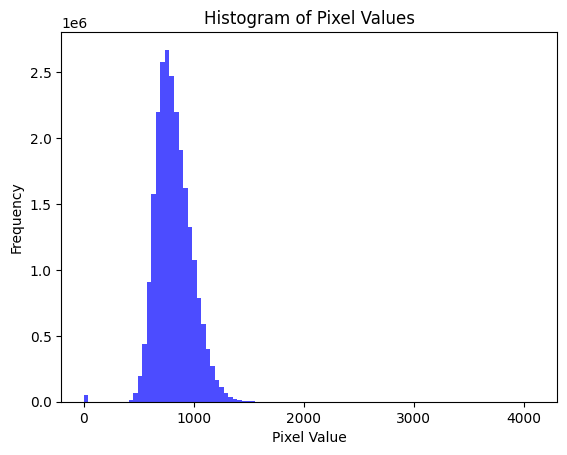

In [12]:
plt.hist(class_raster.read(1).ravel(), bins=100, color='blue', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')
plt.show()

In [ ]:
def clip_all_acquisition(band):
    
        with rasterio.open(band) as src:
            for acquisition in range(1, 74):
                data_array = src.read(acquisition)
                min_val = np.percentile(data_array, 2)
                max_val = np.percentile(data_array, 98)
                norm_data = np.clip( (data_array - min_val) / (max_val - min_val), 0, 1)
                
        return norm_data

list_bands = [second_band]

for bands in list_bands:
    clip_all_acquisition(bands)    

In [ ]:
bands = []
acquisition =

def get_7310(pixel):
    x = pixel(0)
    y = pixel(1)
    pixel_7310 = []
    for band in bands:
        for period in acquisition:
            pixel_7310.append(bands[acquisition, x, y])
    return pixel_7310